# Runge-Kutta Method

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import numpy as np

# Gravity pendulum with dampening
$\frac{d^2\theta}{dt^2} = -\frac{g}{l}sin\theta - k\frac{d\theta}{dt}$

To use RK method we have to first decompose the ODE to a system of first order ODEs:

$\frac{d\omega}{dt} = -\frac{g}{l}sin\theta - k\frac{d\theta}{dt} = f_1(t,\theta,\omega)$

$\frac{d\theta}{dt} = \omega = f_2(t,\theta,\omega)$

<IPython.core.display.Javascript object>


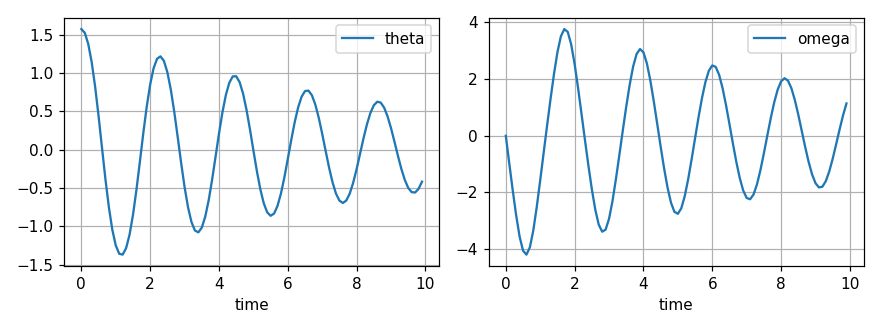

In [43]:
def rk4(fs, t, x, h=0.1):
    """
    Generic ilementation of Runge-Kutta 4th for systems of ODEs
    """
    ks1 = [f(t, x)                                      for f in fs]
    ks2 = [f(t+h/2, [y+h*k1/2 for y,k1 in zip(x, ks1)]) for f in fs]
    ks3 = [f(t+h/2, [y+h*k2/2 for y,k2 in zip(x, ks2)]) for f in fs]
    ks4 = [f(t+h,   [y+h*k3   for y,k3 in zip(x, ks3)]) for f in fs]
    return t+h, [y+h/6*(k1+2*k2+2*k3+k4) for y,k1,k2,k3,k4 in zip(x,ks1,ks2,ks3,ks4)]

g = 9.8066
l = 1
k = 0.2

def f1(t, x):
    theta, omega = x
    return -g/l * math.sin(theta) - k*omega

def f2(t, x):
    theta, omega = x
    return omega

theta0 = math.pi/2
omega0 = 0
x0 = [theta0, omega0]
eqs = [f2, f1]

def rk_ode_solver(rk, eqs, x0, t_interval, dt):
    n_iterations = int((t_interval[1]-t_interval[0])/dt)
    
    t = [None]*n_iterations
    x = [None for _ in range(n_iterations)]
    
    # set initial conditions
    t[0] = t_interval[0]
    x[0] = x0
        
    for i in range(1, n_iterations):
        t[i],x[i] = rk(eqs, t[i-1], x[i-1], dt)
        
    return t, x

t, x = rk_ode_solver(rk4, eqs, x0, [0, 10], 0.1)

x = np.float32(x)
    
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(t, x[:,0], label="theta")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(t, x[:,1], label="omega")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.tight_layout()